In [1]:
import os
import pandas as pd

In [2]:
# Get root directory
project_root = os.path.abspath(os.path.join(os.getcwd(),"..",".."))

sample_annotation_path = os.path.join(project_root, 'Data Annotation/Human Annotation/Sample_annotation.csv')
gpt_path = os.path.join(project_root, 'Data Annotation/LLM Annotation/GPT-4o.csv')
gemini_path = os.path.join(project_root, 'Data Annotation/LLM Annotation/Gemini.csv')
deepseek_path = os.path.join(project_root, 'Data Annotation/LLM Annotation/Deepseek.csv')

Sample_annotation = pd.read_csv(sample_annotation_path)
GPT = pd.read_csv(gpt_path)
Gemini = pd.read_csv(gemini_path)
Deepseek = pd.read_csv(deepseek_path)

In [3]:
Sample_annotation['Annotation'] = Sample_annotation['Annotation'].apply(lambda x: 1 if x == 'Hatespeech' else 0)
GPT['Annotation'] = GPT['Annotation'].apply(lambda x: 1 if x == 'Hatespeech' else 0)
Gemini['Annotation'] = Gemini['Annotation'].apply(lambda x: 1 if x == 'Hatespeech' else 0)
Deepseek['Annotation'] = Deepseek['Annotation'].apply(lambda x: 1 if x == 'Hatespeech' else 0)

In [4]:
y_label = Sample_annotation['Annotation']
y_label

0      1
1      0
2      0
3      1
4      1
      ..
495    0
496    0
497    0
498    0
499    0
Name: Annotation, Length: 500, dtype: int64

In [5]:
GPT_predictions = GPT['Annotation']
Gemini_predictions = Gemini['Annotation']
Deepseek_predictions = Deepseek['Annotation']

In [6]:
from sklearn.metrics import precision_score, recall_score

# Accuracy
GPT_accuracy = (GPT_predictions == y_label).mean()
Gemini_accuracy = (Gemini_predictions == y_label).mean()
Deepseek_accuracy = (Deepseek_predictions == y_label).mean()
# Precision and Recall
GPT_precision = precision_score(y_label, GPT_predictions)
GPT_recall = recall_score(y_label, GPT_predictions)
Gemini_precision = precision_score(y_label, Gemini_predictions)
Gemini_recall = recall_score(y_label, Gemini_predictions)
Deepseek_precision = precision_score(y_label, Deepseek_predictions)
Deepseek_recall = recall_score(y_label, Deepseek_predictions)
from sklearn.metrics import f1_score, classification_report
GPT_f1 = f1_score(y_label, GPT_predictions)
Gemini_f1 = f1_score(y_label, Gemini_predictions)
Deepseek_f1 = f1_score(y_label, Deepseek_predictions)

print("GPT-4o Classification Report:\n", classification_report(y_label, GPT_predictions))
print("Gemini Classification Report:\n", classification_report(y_label, Gemini_predictions))
print("Deepseek Classification Report:\n", classification_report(y_label, Deepseek_predictions))


results = pd.DataFrame({
    'Model': ['Gemini', 'GPT-4o', 'Deepseek'],
    'Accuracy': [Gemini_accuracy, GPT_accuracy, Deepseek_accuracy],
    'Precision': [Gemini_precision, GPT_precision, Deepseek_precision],
    'Recall': [Gemini_recall, GPT_recall, Deepseek_recall],
    'F1 Score': [Gemini_f1, GPT_f1, Deepseek_f1]
})
results = results.set_index('Model')
results = results.style.format({
    'Accuracy': '{:.2%}',
    'Precision': '{:.2%}',
    'Recall': '{:.2%}',
    'F1 Score': '{:.2%}'
})
results

GPT-4o Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       397
           1       0.53      0.45      0.49       103

    accuracy                           0.81       500
   macro avg       0.70      0.67      0.68       500
weighted avg       0.79      0.81      0.80       500

Gemini Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.63      0.75       397
           1       0.37      0.83      0.51       103

    accuracy                           0.67       500
   macro avg       0.65      0.73      0.63       500
weighted avg       0.82      0.67      0.70       500

Deepseek Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.69      0.77       397
           1       0.33      0.58      0.42       103

    accuracy                           0.67       500
   macro avg       0.60      0.64

,Accuracy,Precision,Recall,F1 Score
Model,,,,
Gemini,67.00%,36.75%,83.50%,51.04%
GPT-4o,80.60%,53.49%,44.66%,48.68%
Deepseek,66.60%,32.61%,58.25%,41.81%


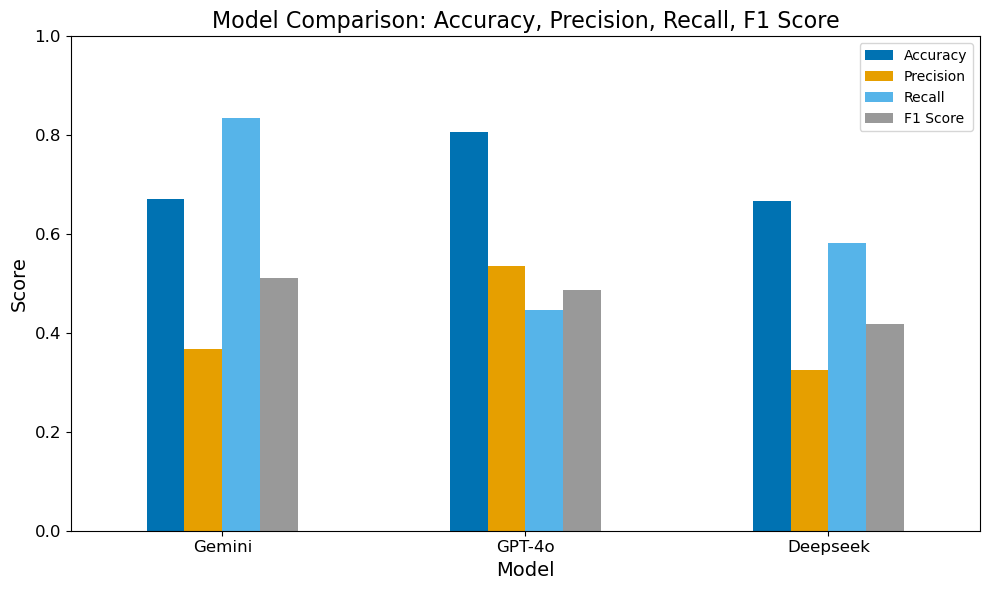

In [15]:
import matplotlib.pyplot as plt

# Use a colorblind-friendly palette
color_palette = ['#0072B2', '#E69F00', '#56B4E9', '#999999']  # blue, orange, light blue, gray

results_df.plot(
    kind='bar',
    figsize=(10, 6),
    color=color_palette[:len(results_df.columns)]
)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Model Comparison: Accuracy, Precision, Recall, F1 Score', fontsize=16)
plt.xticks(fontsize=12, rotation = 0)
plt.yticks(fontsize=12)
plt.ylim(0, 1)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [16]:
#Get the rows in which annotation are same for Deepseek and GPT but different for Gemini

same_for_deepseek_gpt = (Deepseek_predictions == GPT_predictions) & (Deepseek_predictions != Gemini_predictions)
# Filter the Sample_annotation DataFrame based on the condition
filtered_samples = Gemini[same_for_deepseek_gpt]
# Display the filtered samples
print("Samples where Deepseek and GPT agree but differ from Gemini:")
filtered_samples

Samples where Deepseek and GPT agree but differ from Gemini:


,Comment,Annotation
7,​Tu Siriya se bhaga tha​😂,0
8,Can this RRR man can be priest for a day in an...,1
22,Bhai in netaon ke chakkar mein padogay toh yeh...,1
45,बोद्ध धर्म हि समानता दे सकता हे,0
56,he said his teacher insulted him by calling hi...,1
...,...,...
483,Hota hai kahe pe apne yaha pe to thakur barat ...,1
486,दलित हजारों सालों से पिट रहे हैं मगर फिर भी हि...,1
487,Sc st OBC vs Thakur wadi sarkar,1
488,"OBC SC ko prataadit karta hai, SC OBC milkar m...",1


In [17]:
filtered_samples

,Comment,Annotation
7,​Tu Siriya se bhaga tha​😂,0
8,Can this RRR man can be priest for a day in an...,1
22,Bhai in netaon ke chakkar mein padogay toh yeh...,1
45,बोद्ध धर्म हि समानता दे सकता हे,0
56,he said his teacher insulted him by calling hi...,1
...,...,...
483,Hota hai kahe pe apne yaha pe to thakur barat ...,1
486,दलित हजारों सालों से पिट रहे हैं मगर फिर भी हि...,1
487,Sc st OBC vs Thakur wadi sarkar,1
488,"OBC SC ko prataadit karta hai, SC OBC milkar m...",1
